In [63]:
import os,struct

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from PIL import Image
from utils.constants import HIRAGANA

In [64]:
BASE_PATH = './data/etl7'
UNPACK_STRING = '>H2sH6BI4H4B4x2016s4x'
FILES = ['ETL7LC_1']
RECORDS_NB = [9600, 7200, 9600, 7200]
RECORD_LENGTH = 2052 # bytes
WIDTH = 64
HEIGHT = 63
COLUMNS_LABELS = ['hiragana','image_data']

In [65]:
records_list = []

for filename in FILES:
    file_index = FILES.index(filename)
    records_nb = RECORDS_NB[file_index]
    count = 0
    f = open(f'{BASE_PATH}/{filename}', 'rb')

    while count <= records_nb:
        record_string = f.read(RECORD_LENGTH)

        if len(record_string) < RECORD_LENGTH:
            break
            
        record = struct.unpack(UNPACK_STRING, record_string)
        
        phonetic = record[1].decode('ascii')
        hiragana = HIRAGANA[phonetic]
        
        record_data = [hiragana,record[18]]
        
        records_list.append(record_data)     
        count+=1

    f.close()

In [66]:
df = pd.DataFrame(records_list, columns=COLUMNS_LABELS)
df.head()

,hiragana,image_data
0,あ,"b'2#3\x133#""""!""""""2#\x12""3""23\x122#""\x13\x123""3..."
1,あ,"b'3334332""#3""2C""#2#""!3""2#""""""""""23C233CC33C33322..."
2,あ,"b'32333333#22""3""2""#2""#""2#2""#33#3332233#233""22\..."
3,あ,"b'C4B33332232#33##3""###3""2#3243333D3C433#2232$..."
4,あ,"b'2223""2!""""""!""#""""""22""""\x12!""!!""#\x12""""23312#""""..."


In [67]:
len(HIRAGANA)

48

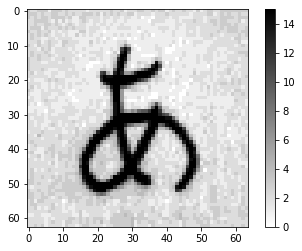

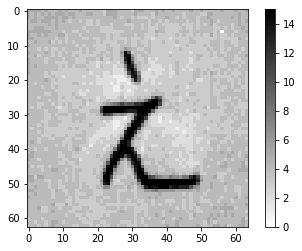

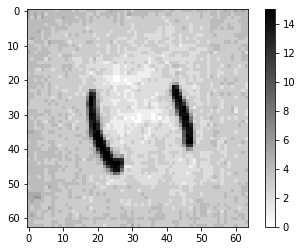

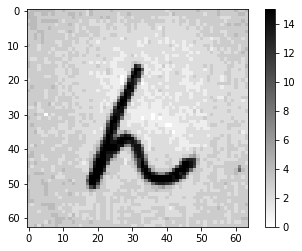

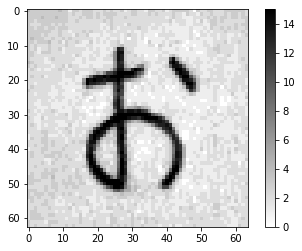

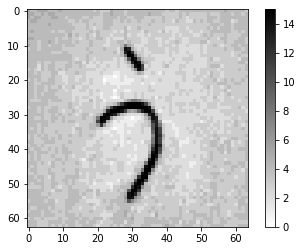

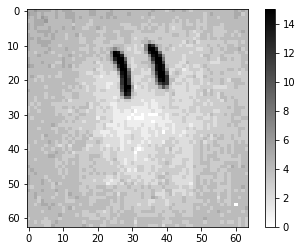

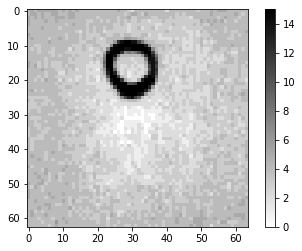

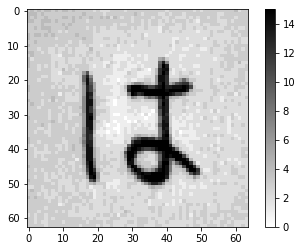

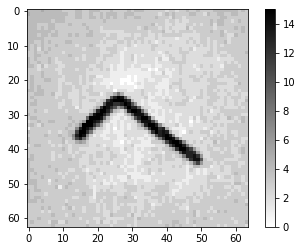

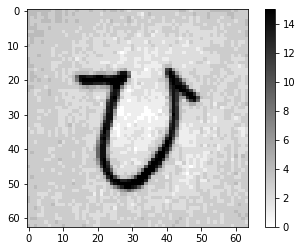

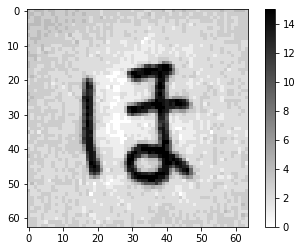

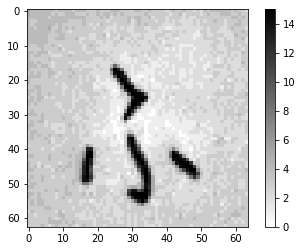

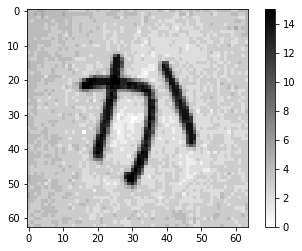

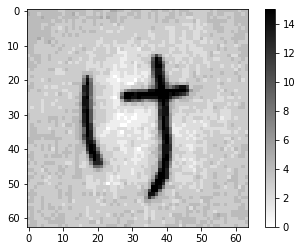

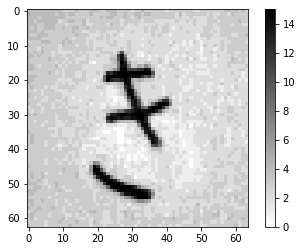

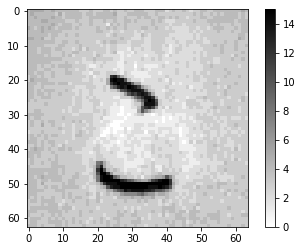

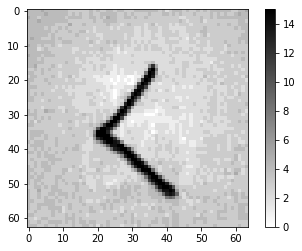

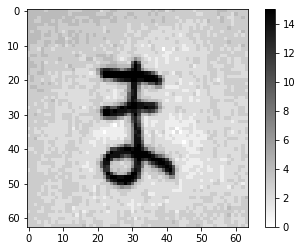

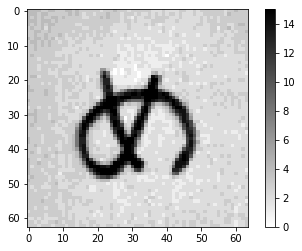

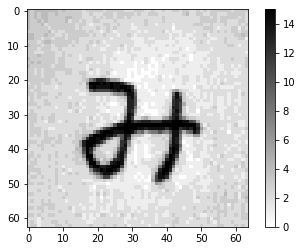

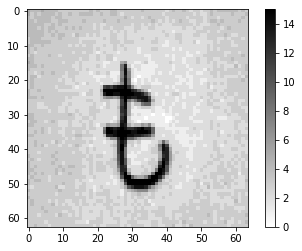

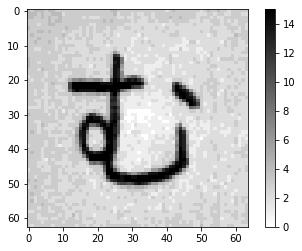

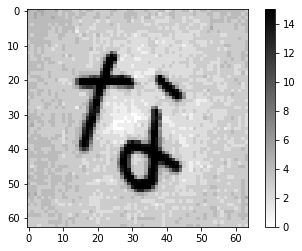

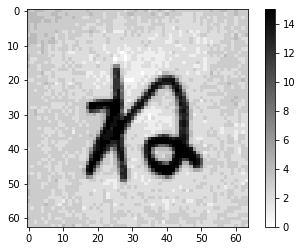

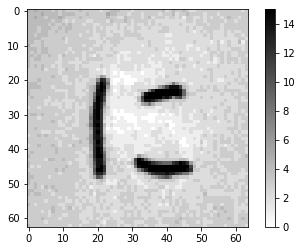

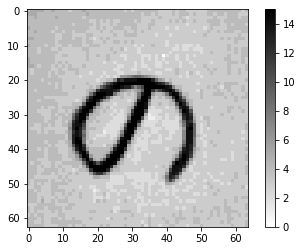

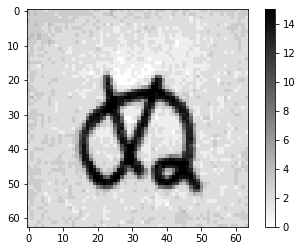

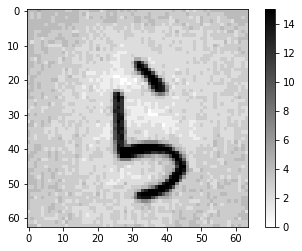

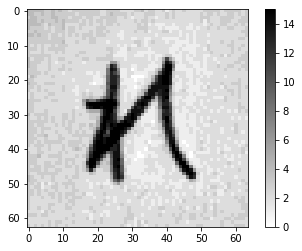

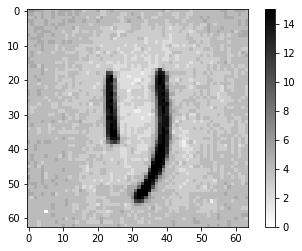

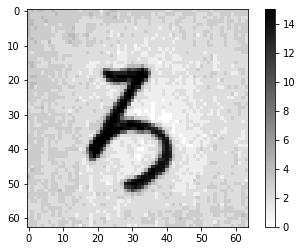

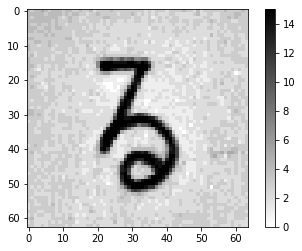

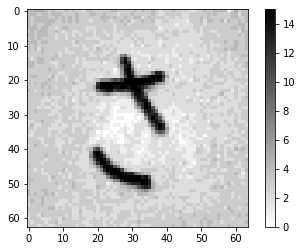

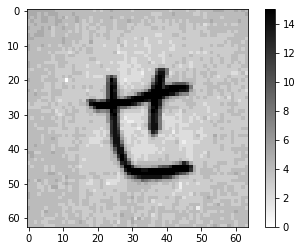

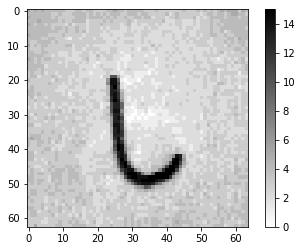

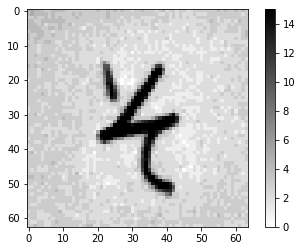

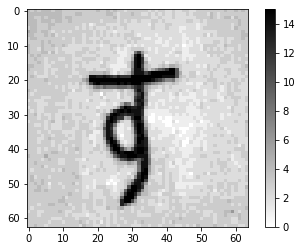

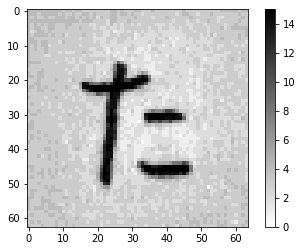

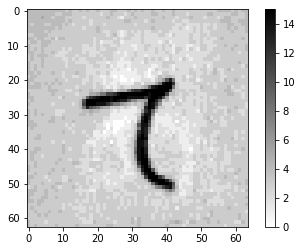

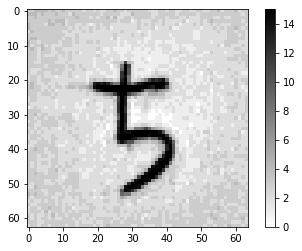

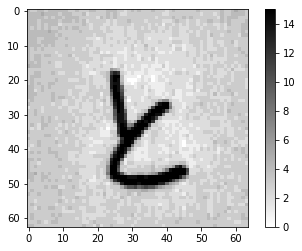

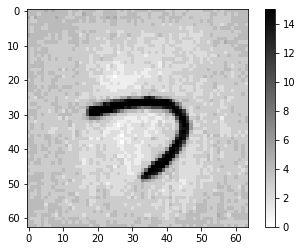

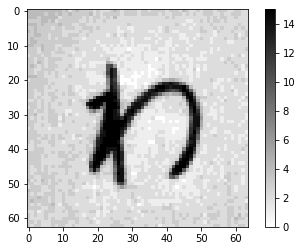

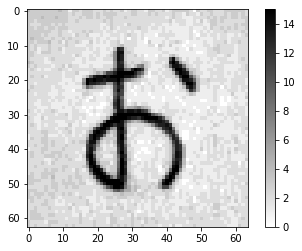

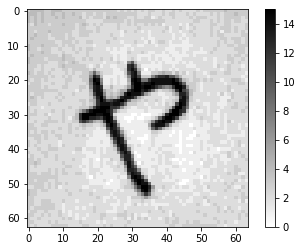

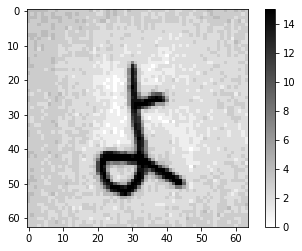

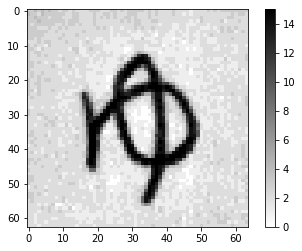

In [68]:
size = len(HIRAGANA) / 2
hiraganas = list(HIRAGANA.values())

for H in hiraganas:
    i = hiraganas.index(H)
    char, img_data = df[df['hiragana'] == H].values[0]
    img = np.array(Image.frombytes('F', (WIDTH, HEIGHT), img_data, 'bit', 4))
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.colorbar()
    plt.show()

In [53]:
reshaped_arr = np.reshape(np.array(Image.frombytes('F', (WIDTH, HEIGHT), img_data, 'bit', 4)), HEIGHT*WIDTH)
reshaped_arr

array([3., 3., 4., ..., 2., 2., 2.], dtype=float32)

In [54]:
format_image = lambda x: np.array(Image.frombytes('F', (WIDTH, HEIGHT), x['image_data'], 'bit', 4))

df['image_bytes_matrix'] = df.apply(format_image, axis=1)

df.head()

,hiragana,image_data,image_bytes_matrix
0,あ,"b'2#3\x133#""""!""""""2#\x12""3""23\x122#""\x13\x123""3...","[[3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 1.0, 3.0, 3.0,..."
1,あ,"b'3334332""#3""2C""#2#""!3""2#""""""""""23C233CC33C33322...","[[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0,..."
2,あ,"b'32333333#22""3""2""#2""#""2#2""#33#3332233#233""22\...","[[3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0,..."
3,あ,"b'C4B33332232#33##3""###3""2#3243333D3C433#2232$...","[[4.0, 3.0, 3.0, 4.0, 4.0, 2.0, 3.0, 3.0, 3.0,..."
4,あ,"b'2223""2!""""""!""#""""""22""""\x12!""!!""#\x12""""23312#""""...","[[3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 2.0,..."


In [55]:
reshape_matrix = lambda x: np.reshape(x['image_bytes_matrix'], WIDTH*HEIGHT)

df['reshaped_matrix'] = df.apply(reshape_matrix, axis=1)

np.shape(df['reshaped_matrix'][0])[0] == WIDTH*HEIGHT

True

In [60]:
x_train = np.array(df['reshaped_matrix'])

x_train

array([array([3., 2., 2., ..., 2., 3., 2.], dtype=float32),
       array([3., 3., 3., ..., 2., 3., 2.], dtype=float32),
       array([3., 3., 3., ..., 3., 3., 1.], dtype=float32), ...,
       array([5., 4., 5., ..., 4., 4., 3.], dtype=float32),
       array([6., 5., 5., ..., 5., 5., 5.], dtype=float32),
       array([4., 3., 3., ..., 3., 4., 4.], dtype=float32)], dtype=object)

In [62]:
y_train = np.array(df['hiragana'])

y_train

array(['あ', 'あ', 'あ', ..., '゜', '゜', '゜'], dtype=object)